In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

N_SAMPLES=10000

def dist_to_origin(ar,dim):
    origin=np.zeros(dim)
    return np.linalg.norm(ar-origin)

def draw_sample(dim,std):
    m=np.zeros(dim)
    var=std**2
    cov=var*np.identity(dim)
    return np.random.multivariate_normal(m,cov,dim)


In [29]:
#  Look at dimensions between 2 and 10
dimension=list(range(2,11))
deviation_list=np.linspace(0,2,num=21,endpoint=True)[1:]
list_of_tuples=list()

#  Container for all the dimensions
dim_d=dict()

for d in dimension:
    #  Container for expectation of N_SAMPLES for single variance
    ex_d=dict()
    for s in deviation_list:
        #  Draw N_SAMPLES
        d_list=[draw_sample(d,s) for i in range(N_SAMPLES)]
        ex_d[s]=abs(np.sum(d_list)/float(N_SAMPLES))
    dim_d[d] = ex_d
    
for dk, dv in dim_d.items():
    print(f'DIMENSION : {dk}')
    for k,v in dv.items():
        print(f'  Var: {k**2:0.3f} Dist: {v:0.4f}')
        list_of_tuples.append((dk,k**2,v))

DIMENSION : 2
  Var: 0.010 Dist: 0.0043
  Var: 0.040 Dist: 0.0049
  Var: 0.090 Dist: 0.0003
  Var: 0.160 Dist: 0.0077
  Var: 0.250 Dist: 0.0006
  Var: 0.360 Dist: 0.0151
  Var: 0.490 Dist: 0.0071
  Var: 0.640 Dist: 0.0432
  Var: 0.810 Dist: 0.0361
  Var: 1.000 Dist: 0.0303
  Var: 1.210 Dist: 0.0027
  Var: 1.440 Dist: 0.0035
  Var: 1.690 Dist: 0.0442
  Var: 1.960 Dist: 0.0108
  Var: 2.250 Dist: 0.0566
  Var: 2.560 Dist: 0.0650
  Var: 2.890 Dist: 0.0196
  Var: 3.240 Dist: 0.0177
  Var: 3.610 Dist: 0.0755
  Var: 4.000 Dist: 0.0150
DIMENSION : 3
  Var: 0.010 Dist: 0.0024
  Var: 0.040 Dist: 0.0089
  Var: 0.090 Dist: 0.0034
  Var: 0.160 Dist: 0.0022
  Var: 0.250 Dist: 0.0045
  Var: 0.360 Dist: 0.0184
  Var: 0.490 Dist: 0.0033
  Var: 0.640 Dist: 0.0077
  Var: 0.810 Dist: 0.0036
  Var: 1.000 Dist: 0.0518
  Var: 1.210 Dist: 0.0018
  Var: 1.440 Dist: 0.0561
  Var: 1.690 Dist: 0.0115
  Var: 1.960 Dist: 0.0106
  Var: 2.250 Dist: 0.0499
  Var: 2.560 Dist: 0.0232
  Var: 2.890 Dist: 0.0709
  Var: 3.2

In [30]:
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

df = pd.DataFrame(list_of_tuples, columns =['dimension', 'variance', 'distance'])
df

,dimension,variance,distance
0,2,0.01,0.004323
1,2,0.04,0.004930
2,2,0.09,0.000280
3,2,0.16,0.007696
4,2,0.25,0.000626
...,...,...,...
175,10,2.56,0.163276
176,10,2.89,0.173919
177,10,3.24,0.122428
178,10,3.61,0.299742


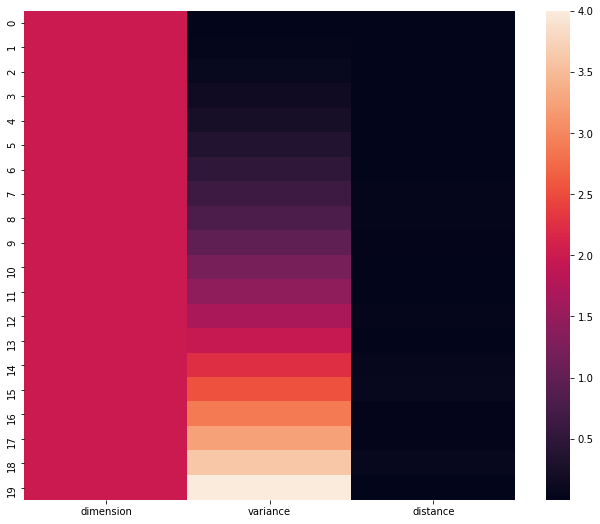

In [44]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df.loc[df['dimension'] == 2])
plt.show()